<a href="https://colab.research.google.com/github/utkarsh0702/Projects/blob/master/Milestone_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.rcParams['figure.figsize']=(10,8)

In [3]:
df= pd.read_excel('Dataset.xlsx')
df

,Hospital,Name,Date of Testing,Age,Gender,Pre-natal Complications,Delivery Type (Normal/ Forceps /C-section),Pre-mature Birth,Delayed Birth Cry,Low/High Birth weight,Neo-natal Jaundice,Low APGAR Score,Congenital organo/body part deffect,Breast feeding Complications,Primary immunizations Done,Low immunity,Seizures,Physical Trauma,Any severe Infection,Cerebral Palsy,Genetic/Chromosomal Issue,Neck Holding (Months),Independent Sitting (months,Independent Walk started (Months),Speech -One word (Months),Speech Sentence (Months),Toilet control (Months),Academic Performance(Good/Average/Poor),Peer group Interaction(Good/ Average/ Poor),Behavioural Issues / Unusual Behaviour,NOWalk/ with support,Unclear / No Speech/ Stammering
0,ACDC,Dhairya,2011-12-22,11 yrs,M,No,Forceps,No,Yes,No,Yes,Yes,yes,No,yes,No,No,No,No,No,No,4,8,13,12,26,28,Average,Good,yes,No,No
1,ACDC,Imad,2011-12-26,6 yrs,M,No,C-section,No,No,No,No,No,NO,No,Yes,Yes,No,NO,No,No,No,6,10,20,24,42,50,Poor,Poor,No,No,NO
2,ACDC,Kalyan,2011-12-12,9 yrs,M,No,Normal,No,No,Yes,No,No,No,No,Yes,Yes,No,No,No,No,No,3,7,12,11,24,30,Average,Poor,No,NO,NO
3,ACDC,Krishna,2011-12-06,7 yrs,M,No,C-section,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,3,7,14,12,42,46,Poor,Poor,Yes,No,No
4,ACDC,Manikya,2011-12-26,2 yrs/ 5 yrs,M,yes,C-section,No,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,4,9,24,18,46,42,Poor,Poor,Yes,No,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ACDC,Manikant,2012-06-19,7 yrs,M,yes,Normal,No,No,No,No,No,NO,No,yes,Yes,No,No,Yes,No,Yes,5,9,24,24,60,66,poor,Average,Yes,No,Yes
96,ACDC,Mani,2012-06-20,5 yrs,M,yes,C-section,No,Yes,No,No,No,NO,No,yes,Yes,No,No,Yes,No,No,3,6,12,18,36,30,good,Average,yes,No,No
97,ACDC,Msri Manju V.,2012-08-16,7 yrs,M,No,C-section,No,No,No,No,No,NO,No,Yes,No,Yes,NO,No,No,No,3,6,12,12,36,30,Good,Average,Yes,No,No
98,ACDC,Manya,2012-12-14,6 yrs,F,yes,C-section,No,No,No,No,No,NO,No,Yes,Yes,Yes,NO,No,no,No,4,7,18,11,36,32,Average,Good,Yes,Yes,NO


# Data Preprocessing

In [4]:
df= df.apply(lambda x: x.astype(str).str.lower())
df

,Hospital,Name,Date of Testing,Age,Gender,Pre-natal Complications,Delivery Type (Normal/ Forceps /C-section),Pre-mature Birth,Delayed Birth Cry,Low/High Birth weight,Neo-natal Jaundice,Low APGAR Score,Congenital organo/body part deffect,Breast feeding Complications,Primary immunizations Done,Low immunity,Seizures,Physical Trauma,Any severe Infection,Cerebral Palsy,Genetic/Chromosomal Issue,Neck Holding (Months),Independent Sitting (months,Independent Walk started (Months),Speech -One word (Months),Speech Sentence (Months),Toilet control (Months),Academic Performance(Good/Average/Poor),Peer group Interaction(Good/ Average/ Poor),Behavioural Issues / Unusual Behaviour,NOWalk/ with support,Unclear / No Speech/ Stammering
0,acdc,dhairya,2011-12-22,11 yrs,m,no,forceps,no,yes,no,yes,yes,yes,no,yes,no,no,no,no,no,no,4,8,13,12,26,28,average,good,yes,no,no
1,acdc,imad,2011-12-26,6 yrs,m,no,c-section,no,no,no,no,no,no,no,yes,yes,no,no,no,no,no,6,10,20,24,42,50,poor,poor,no,no,no
2,acdc,kalyan,2011-12-12,9 yrs,m,no,normal,no,no,yes,no,no,no,no,yes,yes,no,no,no,no,no,3,7,12,11,24,30,average,poor,no,no,no
3,acdc,krishna,2011-12-06,7 yrs,m,no,c-section,no,no,no,no,no,no,no,yes,yes,no,no,no,no,no,3,7,14,12,42,46,poor,poor,yes,no,no
4,acdc,manikya,2011-12-26,2 yrs/ 5 yrs,m,yes,c-section,no,no,no,no,no,no,no,yes,no,no,no,yes,yes,no,4,9,24,18,46,42,poor,poor,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,acdc,manikant,2012-06-19,7 yrs,m,yes,normal,no,no,no,no,no,no,no,yes,yes,no,no,yes,no,yes,5,9,24,24,60,66,poor,average,yes,no,yes
96,acdc,mani,2012-06-20,5 yrs,m,yes,c-section,no,yes,no,no,no,no,no,yes,yes,no,no,yes,no,no,3,6,12,18,36,30,good,average,yes,no,no
97,acdc,msri manju v.,2012-08-16,7 yrs,m,no,c-section,no,no,no,no,no,no,no,yes,no,yes,no,no,no,no,3,6,12,12,36,30,good,average,yes,no,no
98,acdc,manya,2012-12-14,6 yrs,f,yes,c-section,no,no,no,no,no,no,no,yes,yes,yes,no,no,no,no,4,7,18,11,36,32,average,good,yes,yes,no


In [5]:
#Converting yes and no to 2 and 1
df[df == 'yes'] = 2
df[df == 'no'] = 1
df[df == 'nn'] = 1
df[df == 'n'] = 1
# Good, average and poor to 3,2,1
df[df == 'good'] = 3
df[df == 'average'] = 2
df[df == 'poor'] = 1
#converting forceps, normal, c-section
df[df == 'forceps'] = 3
df[df == 'normal'] = 2
df[df == 'c-section'] = 1
df

,Hospital,Name,Date of Testing,Age,Gender,Pre-natal Complications,Delivery Type (Normal/ Forceps /C-section),Pre-mature Birth,Delayed Birth Cry,Low/High Birth weight,Neo-natal Jaundice,Low APGAR Score,Congenital organo/body part deffect,Breast feeding Complications,Primary immunizations Done,Low immunity,Seizures,Physical Trauma,Any severe Infection,Cerebral Palsy,Genetic/Chromosomal Issue,Neck Holding (Months),Independent Sitting (months,Independent Walk started (Months),Speech -One word (Months),Speech Sentence (Months),Toilet control (Months),Academic Performance(Good/Average/Poor),Peer group Interaction(Good/ Average/ Poor),Behavioural Issues / Unusual Behaviour,NOWalk/ with support,Unclear / No Speech/ Stammering
0,acdc,dhairya,2011-12-22,11 yrs,m,1,3,1,2,1,2,2,2,1,2,1,1,1,1,1,1,4,8,13,12,26,28,2,3,2,1,1
1,acdc,imad,2011-12-26,6 yrs,m,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,6,10,20,24,42,50,1,1,1,1,1
2,acdc,kalyan,2011-12-12,9 yrs,m,1,2,1,1,2,1,1,1,1,2,2,1,1,1,1,1,3,7,12,11,24,30,2,1,1,1,1
3,acdc,krishna,2011-12-06,7 yrs,m,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,3,7,14,12,42,46,1,1,2,1,1
4,acdc,manikya,2011-12-26,2 yrs/ 5 yrs,m,2,1,1,1,1,1,1,1,1,2,1,1,1,2,2,1,4,9,24,18,46,42,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,acdc,manikant,2012-06-19,7 yrs,m,2,2,1,1,1,1,1,1,1,2,2,1,1,2,1,2,5,9,24,24,60,66,1,2,2,1,2
96,acdc,mani,2012-06-20,5 yrs,m,2,1,1,2,1,1,1,1,1,2,2,1,1,2,1,1,3,6,12,18,36,30,3,2,2,1,1
97,acdc,msri manju v.,2012-08-16,7 yrs,m,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,3,6,12,12,36,30,3,2,2,1,1
98,acdc,manya,2012-12-14,6 yrs,f,2,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,4,7,18,11,36,32,2,3,2,2,1


In [6]:
df.tail(10)

,Hospital,Name,Date of Testing,Age,Gender,Pre-natal Complications,Delivery Type (Normal/ Forceps /C-section),Pre-mature Birth,Delayed Birth Cry,Low/High Birth weight,Neo-natal Jaundice,Low APGAR Score,Congenital organo/body part deffect,Breast feeding Complications,Primary immunizations Done,Low immunity,Seizures,Physical Trauma,Any severe Infection,Cerebral Palsy,Genetic/Chromosomal Issue,Neck Holding (Months),Independent Sitting (months,Independent Walk started (Months),Speech -One word (Months),Speech Sentence (Months),Toilet control (Months),Academic Performance(Good/Average/Poor),Peer group Interaction(Good/ Average/ Poor),Behavioural Issues / Unusual Behaviour,NOWalk/ with support,Unclear / No Speech/ Stammering
90,acdc,lakshmi,2012-05-24,5 yrs,f,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,3,7,14,11,36,36,2,3,2,1,2
91,acdc,likit,2012-11-03,8 yrs,m,1,1,1,1,1,1,1,1,1,2,2,1,1,2,1,1,4,7,12,11,30,28,2,3,1,1,1
92,acdc,mahk,2012-12-31,11 yrs,f,1,1,1,1,1,1,1,1,1,2,1,2,1,2,1,1,3,7,12,18,60,30,1,2,2,1,2
93,acdc,mahesh,2012-08-01,14 yrs,m,1,2,1,2,2,1,1,1,1,1,2,2,1,1,1,1,9,12,24,12,42,36,1,1,1,1,1
94,acdc,mahezabeen,2012-11-29,3 yrs/5 yrs,f,2,2,1,2,1,1,2,1,2,1,2,2,1,2,2,1,48,62,0,36,0,68,1,1,1,2,2
95,acdc,manikant,2012-06-19,7 yrs,m,2,2,1,1,1,1,1,1,1,2,2,1,1,2,1,2,5,9,24,24,60,66,1,2,2,1,2
96,acdc,mani,2012-06-20,5 yrs,m,2,1,1,2,1,1,1,1,1,2,2,1,1,2,1,1,3,6,12,18,36,30,3,2,2,1,1
97,acdc,msri manju v.,2012-08-16,7 yrs,m,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,3,6,12,12,36,30,3,2,2,1,1
98,acdc,manya,2012-12-14,6 yrs,f,2,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,4,7,18,11,36,32,2,3,2,2,1
99,acdc,amir,2012-03-31,7 yrs,m,2,1,1,1,1,1,1,1,1,2,2,2,1,2,1,1,4,8,14,12,36,30,2,3,2,1,1


In [7]:
x_data= df.iloc[:,5:21]
# x_data.drop(['Seizures', 'Physical Trauma', 'Any severe Infection'], axis=1, inplace=True)
x_data.drop

<bound method DataFrame.drop of    Pre-natal Complications  ... Genetic/Chromosomal Issue
0                        1  ...                         1
1                        1  ...                         1
2                        1  ...                         1
3                        1  ...                         1
4                        2  ...                         1
..                     ...  ...                       ...
95                       2  ...                         2
96                       2  ...                         1
97                       1  ...                         1
98                       2  ...                         1
99                       2  ...                         1

[100 rows x 16 columns]>

In [8]:
x_data_mod= x_data.to_numpy()
print(x_data_mod.shape)
x_data_mod

(100, 16)


array([[1, 3, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 2, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [2, 1, 1, ..., 1, 1, 1],
       [2, 1, 1, ..., 2, 1, 1]], dtype=object)

**Taking y label only the first column**

In [9]:
y_data=df.iloc[:,21].to_numpy()
y_data= y_data.reshape(100,1)
y_data.shape

(100, 1)

In [10]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test= train_test_split(x_data_mod, y_data, test_size=0.05)
# x_train= x_train.reshape(90,16,1)
# x_test= x_test.reshape(10,16,1)
x_train= tf.convert_to_tensor(x_train, tf.float16)
y_train= tf.convert_to_tensor(y_train, tf.float16)
x_test= tf.convert_to_tensor(x_test, tf.float16)
y_test= tf.convert_to_tensor(y_test, tf.float16)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(95, 16)
(5, 16)
(95, 1)
(5, 1)


In [37]:
# making weights initialization predictable
# np.random.seed(0)

# Learning Rate Scheduling


In [38]:
keras.backend.clear_session()
model= keras.models.Sequential([
                              # tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=-1), input_shape=[None]),
                              # keras.layers.Bidirectional(keras.layers.LSTM(32, return_sequences=True)),
                              # keras.layers.Bidirectional(keras.layers.LSTM(16, return_sequences=True)),
                              # keras.layers.Bidirectional(keras.layers.LSTM(13)),
                              # # keras.layers.Flatten(),
                              # keras.layers.Dense(256, activation='relu'),
                              # keras.layers.Dropout(0.2),
                              # keras.layers.Dense(64, activation='relu'),
                              # keras.layers.Dropout(0.4), 
                              keras.layers.Dense(16, activation='relu', input_shape=(1,16)),
                              keras.layers.Dropout(0.6), 
                              keras.layers.Dense(8, activation='relu'),
                              keras.layers.Dense(4, activation='relu'),
                              keras.layers.Dense(1)
])

#Learning Rate Schedular
lr_schedular= tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-6*10**(x/20))

#model compile
adam=keras.optimizers.Adam(lr=1e-6)
model.compile(optimizer= adam, loss='mse')

#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 16)             272       
_________________________________________________________________
dropout (Dropout)            (None, 1, 16)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1, 8)              136       
_________________________________________________________________
dense_2 (Dense)              (None, 1, 4)              36        
_________________________________________________________________
dense_3 (Dense)              (None, 1, 1)              5         
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [39]:
history= model.fit(x_train, y_train, epochs=200,callbacks= [lr_schedular])

Epoch 1/200
3/3 [==============================] - 0s 2ms/step - loss: 89.9136 - lr: 1.0000e-06
Epoch 2/200
3/3 [==============================] - 0s 2ms/step - loss: 89.8239 - lr: 1.1220e-06
Epoch 3/200
3/3 [==============================] - 0s 2ms/step - loss: 90.2365 - lr: 1.2589e-06
Epoch 4/200
3/3 [==============================] - 0s 2ms/step - loss: 90.0245 - lr: 1.4125e-06
Epoch 5/200
3/3 [==============================] - 0s 2ms/step - loss: 89.5888 - lr: 1.5849e-06
Epoch 6/200
3/3 [==============================] - 0s 2ms/step - loss: 89.7503 - lr: 1.7783e-06
Epoch 7/200
3/3 [==============================] - 0s 2ms/step - loss: 89.6536 - lr: 1.9953e-06
Epoch 8/200
3/3 [==============================] - 0s 2ms/step - loss: 90.0573 - lr: 2.2387e-06
Epoch 9/200
3/3 [==============================] - 0s 2ms/step - loss: 87.8131 - lr: 2.5119e-06
Epoch 10/200
3/3 [==============================] - 0s 2ms/step - loss: 90.1364 - lr: 2.8184e-06
Epoch 11/200
3/3 [=====================

In [40]:
loss= min(history.history['loss'])
losses= history.history['loss']
index=losses.index(loss)
lrs= history.history['lr']
count=0
for i in lrs:
  if count==index:
    lr=i
    break
  count+=1
print(lr)
print(loss)

0.06309573
50.30193328857422


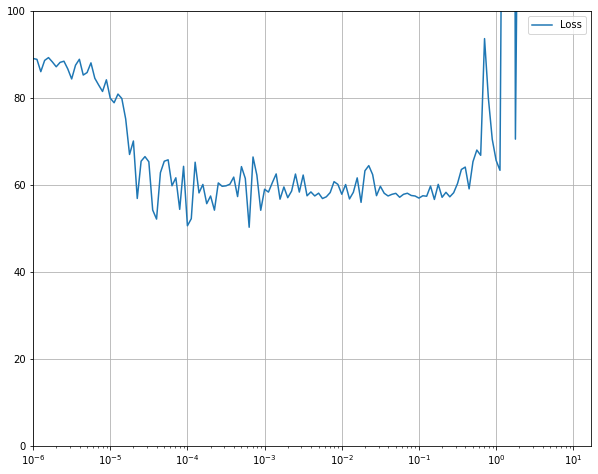

In [41]:
lrs= 1e-8*(10**(np.arange(200)/20))
plt.semilogx(lrs, history.history["loss"], label='Loss')
plt.axis([1e-6, 1.7e1, 0, 100])
plt.legend(loc='best')
plt.grid(True)

## Training the model

In [42]:
keras.backend.clear_session()
model= keras.models.Sequential([
                              # tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=-1), input_shape=[None]),
                              # keras.layers.Bidirectional(keras.layers.LSTM(32, return_sequences=True)),
                              # keras.layers.Bidirectional(keras.layers.LSTM(16, return_sequences=True)),
                              # keras.layers.Bidirectional(keras.layers.LSTM(13)),
                              # keras.layers.Flatten(),
                              # keras.layers.Dense(256, activation='relu'),
                              # keras.layers.Dropout(0.2),
                              # keras.layers.Dense(64, activation='relu'),
                              # keras.layers.Dropout(0.4), 
                              # keras.layers.Dense(16, activation='relu'),
                              # keras.layers.Dropout(0.6), 
                              keras.layers.Dense(16, activation='relu', input_shape=(1,16)),
                              keras.layers.Dropout(0.6), 
                              keras.layers.Dense(8, activation='relu'),
                              keras.layers.Dense(4, activation='relu'),
                              keras.layers.Dense(1)
])

#model compile
adam=keras.optimizers.Adam(lr=lr)
model.compile(optimizer= adam, loss='mse')

#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 16)             272       
_________________________________________________________________
dropout (Dropout)            (None, 1, 16)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1, 8)              136       
_________________________________________________________________
dense_2 (Dense)              (None, 1, 4)              36        
_________________________________________________________________
dense_3 (Dense)              (None, 1, 1)              5         
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [43]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=1,
                                                save_best_only=True, mode='auto', period=1)

In [44]:
history= model.fit(x_train, y_train, epochs= 10, callbacks=[checkpoint])

Epoch 1/10
1/3 [=========>....................] - ETA: 0s - loss: 201.3264
Epoch 00001: loss improved from inf to 93.50719, saving model to best_model.hdf5
3/3 [==============================] - 0s 8ms/step - loss: 93.5072
Epoch 2/10
1/3 [=========>....................] - ETA: 0s - loss: 14.2740
Epoch 00002: loss improved from 93.50719 to 70.19507, saving model to best_model.hdf5
3/3 [==============================] - 0s 7ms/step - loss: 70.1951
Epoch 3/10
1/3 [=========>....................] - ETA: 0s - loss: 166.7229
Epoch 00003: loss improved from 70.19507 to 68.82578, saving model to best_model.hdf5
3/3 [==============================] - 0s 8ms/step - loss: 68.8258
Epoch 4/10
1/3 [=========>....................] - ETA: 0s - loss: 21.6063
Epoch 00004: loss did not improve from 68.82578
3/3 [==============================] - 0s 2ms/step - loss: 70.6368
Epoch 5/10
1/3 [=========>....................] - ETA: 0s - loss: 183.8884
Epoch 00005: loss did not improve from 68.82578
3/3 [=====

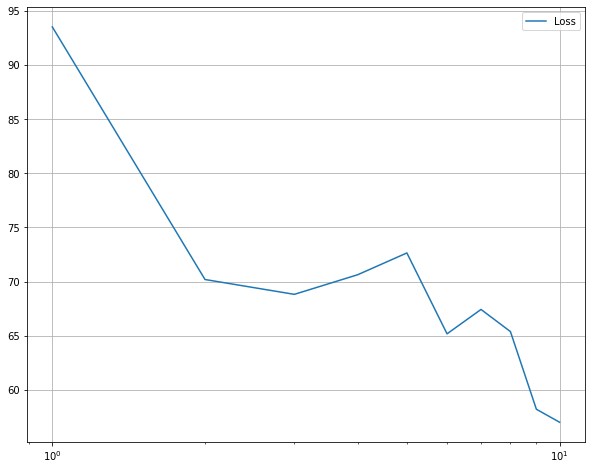

In [45]:
epochs= range(1,11)
plt.semilogx(epochs, history.history["loss"], label='Loss')
plt.legend(loc='best')
plt.grid(True)

In [46]:
model= tf.keras.models.load_model('best_model.hdf5')

In [47]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 1ms/step - loss: 7.0884


7.088428497314453

In [48]:
pred= model.predict(x_test)
pred

array([[5.7481995],
       [5.9108276],
       [6.424657 ],
       [5.6984673],
       [5.5011873]], dtype=float32)

In [49]:
y_test

<tf.Tensor: shape=(5, 1), dtype=float16, numpy=
array([[3.],
       [3.],
       [4.],
       [3.],
       [3.]], dtype=float16)>

# Cross Validation

In [ ]:
#diving data into 5 equal parts
cross_x=[]
cross_y=[]
for i in range(1,5):
  if i==4:
    cross_x.append(x_data_mod[(i-1)*20:])
    cross_y.append(y_data[(i-1)*20:])
  cross_x.append(x_data_mod[(i-1)*20:i*20])
  cross_y.append(y_data[(i-1)*20:i*20])

print(len(cross_x))
print(len(cross_y))

5
5


In [ ]:
def cross_val_artificial():
  


In [ ]:
cross_val_score(model,x_train, y_train)

TypeError: ignored